In [6]:
import pandas as pd
import numpy as np
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('C:/Users/Rasmu/Downloads/ner_dataset.csv', encoding = "ISO-8859-1", error_bad_lines=False)
df = df[:100000]
df = df.fillna(method='ffill')
df.head()

C:\Users\Rasmu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [7]:
df['Sentence #'].nunique(), df.Word.nunique(), df.Tag.nunique()
df.groupby('Tag').size().reset_index(name='counts')

,Tag,counts
0,B-art,75
1,B-eve,53
2,B-geo,3303
3,B-gpe,1740
4,B-nat,30
5,B-org,1876
6,B-per,1668
7,B-tim,1823
8,I-art,43
9,I-eve,47


In [8]:
X = df.drop('Tag', axis=1)
v = DictVectorizer(sparse=False)
X = v.fit_transform(X.to_dict('records'))
y = df.Tag.values
classes = np.unique(y)
classes = classes.tolist()
new_classes = classes.copy()
new_classes.pop()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


parameter_space = {
    'hidden_layer_sizes': [(15,)],
    'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'alpha': np.arange(0.0001, 0.01, 0.001),
    'learning_rate': ['constant','adaptive'],
}

classifier = MLPClassifier(hidden_layer_sizes=(15,), activation='relu', solver='adam', max_iter=50,random_state=0)
classifier.fit(X_train, y_train)

C:\Users\Rasmu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(15,), max_iter=50, random_state=0)

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred, labels = new_classes)
print(cr)

              precision    recall  f1-score   support

       B-art       0.33      0.21      0.26        24
       B-eve       0.36      0.21      0.27        19
       B-geo       0.73      0.71      0.72      1085
       B-gpe       0.85      0.81      0.83       556
       B-nat       0.67      0.17      0.27        12
       B-org       0.47      0.50      0.48       589
       B-per       0.61      0.54      0.58       564
       B-tim       0.78      0.68      0.72       611
       I-art       0.20      0.17      0.18        12
       I-eve       1.00      0.22      0.36        18
       I-geo       0.54      0.56      0.55       230
       I-gpe       0.70      0.50      0.58        14
       I-nat       0.33      0.50      0.40         2
       I-org       0.46      0.54      0.50       445
       I-per       0.65      0.62      0.64       591
       I-tim       0.28      0.30      0.29       194

   micro avg       0.63      0.61      0.62      4966
   macro avg       0.56   

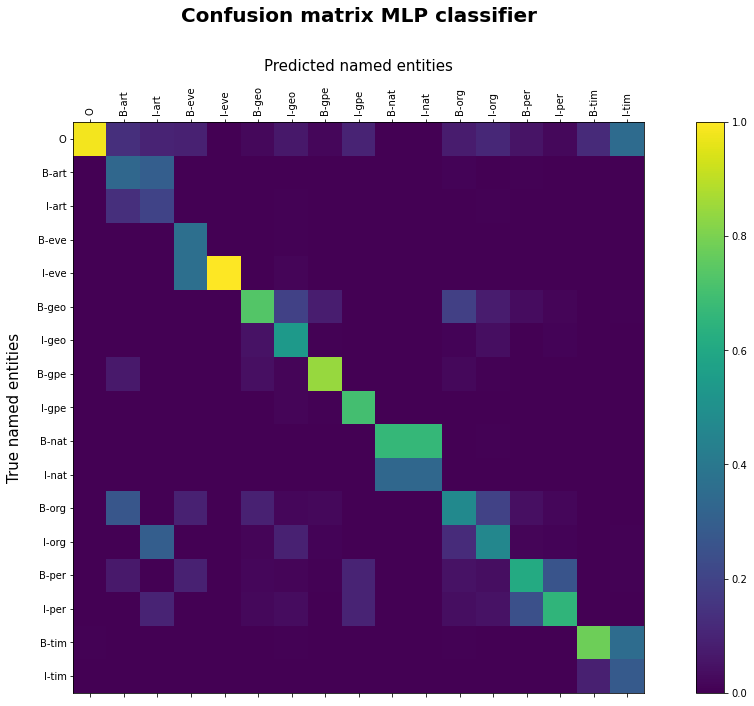

In [61]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sortedLabels = ['O','B-art','I-art','B-eve','I-eve','B-geo','I-geo','B-gpe','I-gpe','B-nat','I-nat','B-org','I-org','B-per','I-per','B-tim','I-tim']
cm = confusion_matrix(y_test, y_pred, labels=sortedLabels, normalize='pred')


fig = plt.figure( figsize=[18.5,10.5])
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
ax.set_xlabel('Predicted named entities', fontsize = 15, labelpad=15.0)
ax.xaxis.set_label_position('top')
ax.set_ylabel('True named entities', fontsize = 15, labelpad=15.0)
ax.set_title('Confusion matrix MLP classifier',fontweight="bold", size=20, pad=100.0)

fig.colorbar(cax)
plt.xticks(range(len(sortedLabels)), sortedLabels, rotation=90)
plt.yticks(range(len(sortedLabels)), sortedLabels)
plt.show()

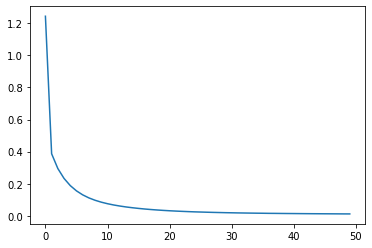

In [13]:

plt.plot(classifier.loss_curve_)
plt.show()